In [16]:
# imports
import numpy as np
import os
import torch
# import librosa
import torchaudio
import matplotlib.pyplot as plt

# customizable imports
from extract_logspec import(
    get_logspec,
    expand_logspec
)


In [55]:
# Global settings
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

savepath = '/home/ndmobilecomp/efficient_spoof/efficient-voice-antispoof/figs'

## LogSpec view

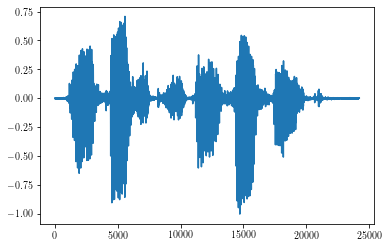

In [31]:
# get the raw wave
audio_path = os.path.join('/home/ndmobilecomp/efficient_spoof/efficient-voice-antispoof/data/ASVspoof2017/train', "T_1000003.wav")
waveform, sample_rate = torchaudio.load(audio_path)
plt.figure(1)
plt.plot(waveform.t().numpy())

In [32]:
# original logspec
logspec = get_logspec(audio_path, device=torch.device("cpu"))
print(logspec.shape)
# expanded to 1091 logspec
exp_lsp = expand_logspec(logspec)
print(exp_lsp.shape)

torch.Size([151, 257])
torch.Size([1091, 257])


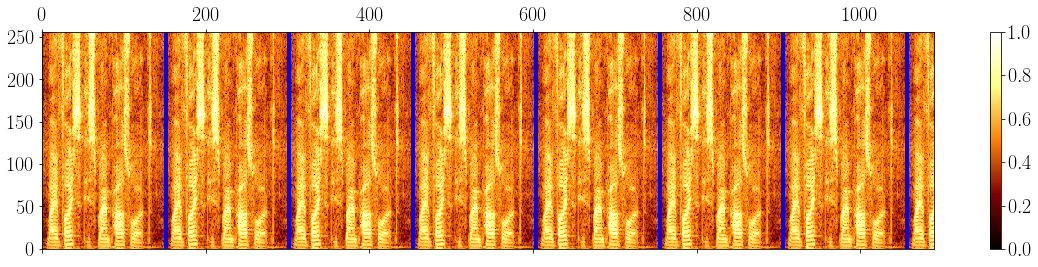

In [76]:
# plot the 1091 length logspec
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,4))
plt.rc('font', size=20)

cax = ax.matshow(exp_lsp.T, interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
plt.axvline(x=151, linewidth=4, color='b')
plt.axvline(x=151*2, linewidth=4, color='b')
plt.axvline(x=151*3, linewidth=4, color='b')
plt.axvline(x=151*4, linewidth=4, color='b')
plt.axvline(x=151*5, linewidth=4, color='b')
plt.axvline(x=151*6, linewidth=4, color='b')
plt.axvline(x=151*7, linewidth=4, color='b')
fig.colorbar(cax)

lsp_path = os.path.join(savepath, 'logspec_sample.pdf')
plt.savefig(lsp_path, bbox_inches="tight")


## input length distribution

In [58]:
# set macros
PWD = os.getcwd()
DATA_DIR = os.path.join(os.path.dirname(PWD), 'data', 'ASVspoof2017')
LABEL_DIR = os.path.join(os.path.dirname(PWD), 'data', 'ASVspoof2017', 'protocol_V2')
DEVICE = torch.device('cpu')

In [59]:
# extract feat and record feat dim (257 is a fixed dim, not tracked)
feat_len = {
    'train': [],
    'dev': [],
    'eval': []
}
cnt = 0
for ds in ('train', 'dev', 'eval'):
    label_file = os.path.join(LABEL_DIR, ds+'.txt')
    f_label = open(label_file, 'r')
    for line in f_label:
        item = line.strip().split(' ')
        audio_path = os.path.join(DATA_DIR, ds, item[0])
        # note that this logspec has not been expanded or transposed
        logspec = get_logspec(audio_path=audio_path, device=DEVICE)
        feat_len[ds].append(logspec.shape[0])
    f_label.close()

In [60]:
# check total number of data/feat
# train: 3014; dev: 1710; eval: 13306
print("train set total count: {}".format(len(feat_len['train'])))
print("dev set total count: {}".format(len(feat_len['dev'])))
print("eval set total count: {}".format(len(feat_len['eval'])))

train set total count: 3014
dev set total count: 1710
eval set total count: 13306


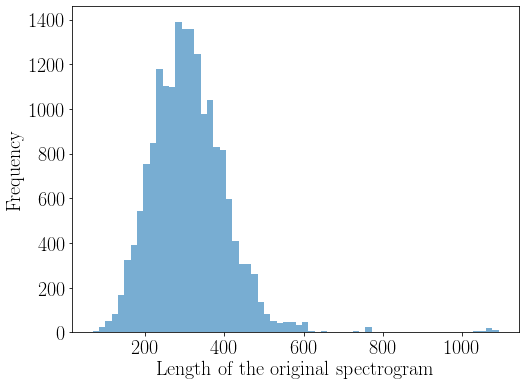

In [71]:
# plot the histogram
all_feat_len = feat_len['train'] + feat_len['dev'] + feat_len['eval']
plt.figure(figsize=(8,6))
plt.hist(all_feat_len, bins=64, alpha=0.6)
plt.xlabel("Length of the original spectrogram")
plt.ylabel("Frequency")
plt.rc('font', size=20)

hist_path = os.path.join(savepath, 'hist_utt_len.pdf')
plt.savefig(hist_path, bbox_inches="tight")